<a href="https://colab.research.google.com/github/jhomolos/data_projects/blob/main/480_Case_Final_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CASE FINAL - CLASSIFICAÇÃO**

Mais uma vez, o problema agora será de Churn, muito utilizado no mercado. Para isso, deve-se seguir o CRISP-DM, a etapa de entendimento das variáveis, entendimento dos dados, descritiva, exploratória, escolha modelos de classificação, e por fim, fazer tunning sobre os resultados e quais os melhores a serem implementados

In [268]:
# Importando as bibliotecas necessárias para o case
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, f1_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [269]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [270]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Mês 7/16 - Case Final- Classificacao/churn_data.xlsx')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Business Understanding

In [271]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Deseja-se aqui classificar um cliente como provável Churn ou Não-Churn com base em suas características. Essas características estão descritas nas suas colunas a seguir:

# **Variáveis numéricas**

**Tenure** - Número de meses que o cliente está na base MonthlyCharges - A quantia consumida **por cliente mensalmente

**TotalCharges** - A quantia consumida por cliente total

----------------------------------------------------------


# **Variáveis categóricas**


**CustomerID** - Id do cliente

**Gender** - M/F

**SeniorCitizen** - Se o cidadão é ou não idoso (0,1)

**Partner** - Se o cliente é ou não casado

**Dependents** - Cliente tem dependentes (Yes, No)

**PhoneService** - Cliente tem serviço telefonico (Yes, No)

**Mulitplelines** - Se o cliente tem várias linhas ou não (Yes, No, No Phone Service)

**Internet Service** - Tipo do serviço de internet (DSL, Fiber Optic, None)

**OnlineSecurity** - Se o cliente tem segurança online (Yes, No, No Internet Service)

**OnlineBackup** - Se o cliente tem Backup Online (Yes, No, No Internet Service)

**DeviceProtection** Se o cliente tem proteção do dispositivo (Yes, No, No Internet Service)

**TechSupport** - Se o cliente tem suporte tecnológico (Yes, No, No Internet Service)

**StreamingTV** - Se o cliente tem streaming de TV (Yes, No, No Internet Service)

**StreamingMovies** - Se o cliente tem serviço de streaming de filmes (Yes, No, No Internet Service)

**Contract** - Termo de contrato do cliente (Monthly, 1-Year, 2-Year)

**PaperlessBilling** - Se o cliente tem ou não boleto sem papel (Yes, No)

**Payment Method** - Método de pagamento do cliente (E-Check, Mailed Check, Bank Transfer (Auto), Credit Card (Auto))

---------------------------------------------------------------

# **Variável target:**

**Churn** - se o cliente é Churn ou não (Yes/No)





# Data Understanding

In [272]:
df.shape

(7032, 21)

A base de dados é composta por 7.032 linhas e 21 features (variáveis ou colunas), no total. Conforme vimos acima, temos 3 variáveis numéricas, 17 variáveis categóricas e 1 variável de saída (target).

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Em todas as suas linhas, não se verifica presença de dados nulos, posto que todas as colunas possuem exatamente 7.032 dados não nulos. Como observamos, as variáveis numéricas possuem um tipo compatível, isto é, ou são float ('MontlyCharges' e 'TotalCharges') ou do tipo integer ('tenure'). As demais, por serem explicativas, estão devidamente representadas com o tipo object, e.g. texto (string).

In [274]:
df.duplicated().sum()

0

Verifica-se também que não há registros duplicados na base de dados. Passaremos agora a explorar os dados para obtermos alguns insights.

In [275]:
df_gender = df.groupby('gender')['customerID'].count().reset_index()
df_gender.columns = ['gender', 'count']
df_gender

,gender,count
0,Female,3483
1,Male,3549


Text(0.5, 1.0, 'Distribuição por gênero')

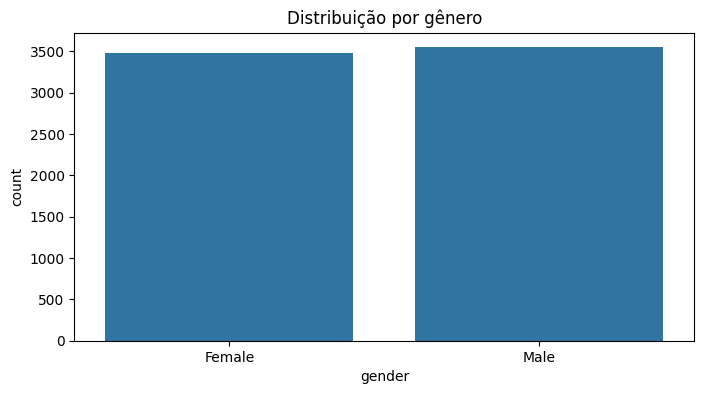

In [276]:
plt.figure(figsize=[8,4])
sns.barplot(data = df_gender, x = "gender", y = "count")
plt.title("Distribuição por gênero")

A distribuição da população entre homens e mulheres é bastante aproximada.

<Axes: xlabel='SeniorCitizen'>

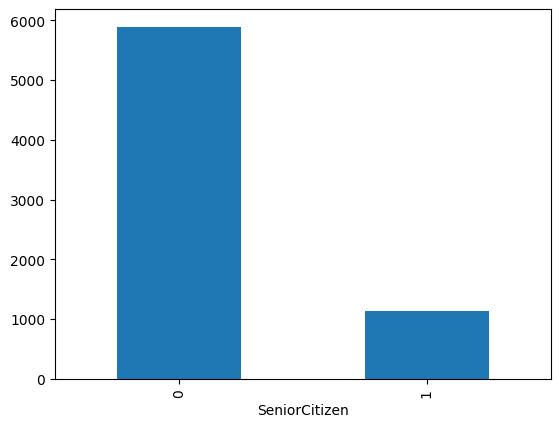

In [277]:
df['SeniorCitizen'].value_counts().plot(kind='bar')

Verifica-se que aqui que a população alvo da análise é predominantemente jovem.

In [278]:
df_partner = df.groupby('Partner')['customerID'].count().reset_index()
df_partner.columns = ['Partner', 'count']
df_partner

,Partner,count
0,No,3639
1,Yes,3393


Text(0.5, 1.0, 'Distribuição por estado civil')

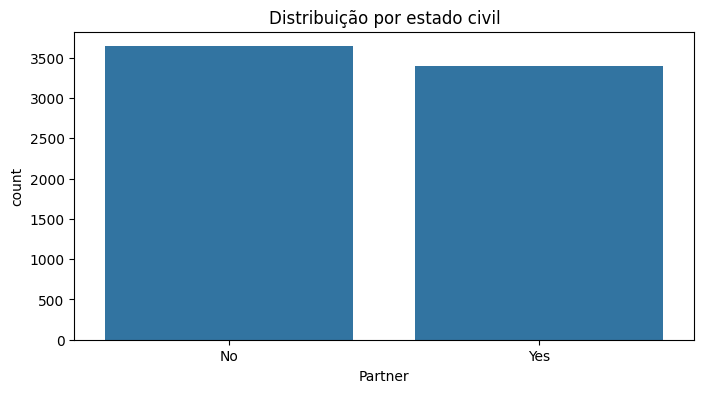

In [279]:
plt.figure(figsize=[8,4])
sns.barplot(data = df_partner, x = "Partner", y = "count")
plt.title("Distribuição por estado civil")

O estado civil dos Churn é em sua maioria composto por casados, embora a quantidade de solteiros seja pouco menor.

In [280]:
df_payment = df.groupby('PaymentMethod')['customerID'].count().reset_index()
df_payment.columns = ['PaymentMethod', 'count']
df_payment

,PaymentMethod,count
0,Bank transfer (automatic),1542
1,Credit card (automatic),1521
2,Electronic check,2365
3,Mailed check,1604


([0, 1, 2, 3],
 [Text(0, 0, 'Bank transfer (automatic)'),
  Text(1, 0, 'Credit card (automatic)'),
  Text(2, 0, 'Electronic check'),
  Text(3, 0, 'Mailed check')])

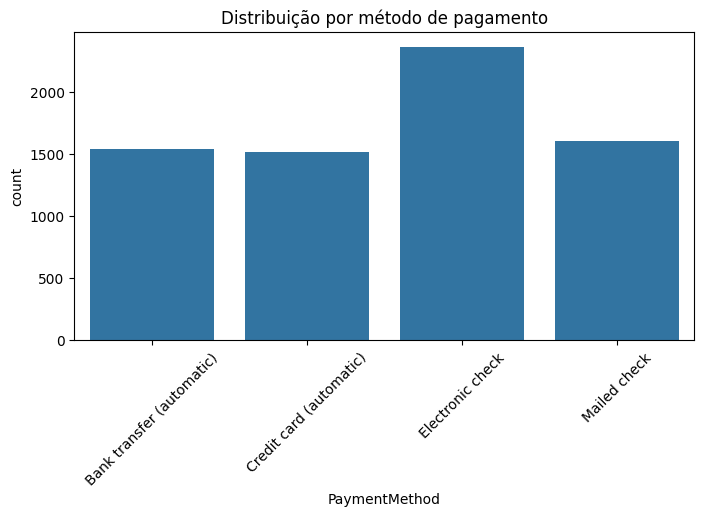

In [281]:
plt.figure(figsize=[8,4])
sns.barplot(data = df_payment, x = "PaymentMethod", y = "count")
plt.title("Distribuição por método de pagamento")
plt.xticks(rotation=45)

Os churn possuem preferência em fazer o pagamento através de check eletrônico.

In [282]:
df_contract = df.groupby("Contract")["customerID"].count().reset_index()
df_contract.columns = ["Contract", "count"]
df_contract

,Contract,count
0,Month-to-month,3875
1,One year,1472
2,Two year,1685


([0, 1, 2],
 [Text(0, 0, 'Month-to-month'),
  Text(1, 0, 'One year'),
  Text(2, 0, 'Two year')])

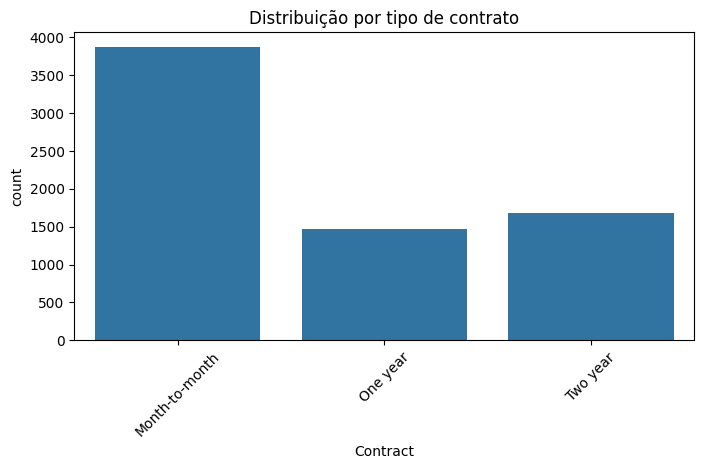

In [283]:
plt.figure(figsize=[8,4])
sns.barplot(data = df_contract, x = "Contract", y = "count")
plt.title("Distribuição por tipo de contrato")
plt.xticks(rotation=45)

Os Churn possuem preferência por não fazer contratos de longos prazos, e sim, mensais.

# Data Preparation

Vamos excluir as features que não são relevantes para os modelos que serão construídos:

In [284]:
df = df.drop(['customerID'], axis=1)

Agora vamos tratar as variáveis categóricas

In [285]:
le = LabelEncoder()
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = le.fit_transform(df[col])

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


Agora vamos normalizar os dados:

In [286]:
X = df.drop(['Churn'], axis=1)
y = df[['Churn']]

In [287]:
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009430,-0.440327,1.035617,-0.652305,-1.280248,-3.056334,0.062666,-1.183614,-0.917837,1.242875,-1.026988,-0.924267,-1.112632,-1.121501,-0.826735,0.828939,0.399805,-1.161694,-0.994194
1,0.990658,-0.440327,-0.965608,-0.652305,0.064303,0.327189,-0.991564,-1.183614,1.408012,-1.028998,1.245441,-0.924267,-1.112632,-1.121501,0.373926,-1.206361,1.336636,-0.260878,-0.173740
2,0.990658,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.991564,-1.183614,1.408012,1.242875,-1.026988,-0.924267,-1.112632,-1.121501,-0.826735,0.828939,1.336636,-0.363923,-0.959649
3,0.990658,-0.440327,-0.965608,-0.652305,0.512486,-3.056334,0.062666,-1.183614,1.408012,-1.028998,1.245441,1.396963,-1.112632,-1.121501,0.373926,-1.206361,-1.473857,-0.747850,-0.195248
4,-1.009430,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.991564,0.172835,-0.917837,-1.028998,-1.026988,-0.924267,-1.112632,-1.121501,-0.826735,0.828939,0.399805,0.196178,-0.940457


In [288]:
df = pd.concat([X, y], axis=1)
df.head()

#import statsmodels.formula.api as smf

#function = "Churn~+ gender+ SeniorCitizen+ Partner+ Dependents+tenure+ PhoneService+ MultipleLines+ InternetService+OnlineSecurity+ OnlineBackup+ DeviceProtection+ TechSupport+StreamingTV+ StreamingMovies+ Contract+ PaperlessBilling+PaymentMethod+ MonthlyCharges+ TotalCharges"
#model = smf.ols(formula = function, data = df).fit()
#model.summary()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,-1.009430,-0.440327,1.035617,-0.652305,-1.280248,-3.056334,0.062666,-1.183614,-0.917837,1.242875,-1.026988,-0.924267,-1.112632,-1.121501,-0.826735,0.828939,0.399805,-1.161694,-0.994194,0
1,0.990658,-0.440327,-0.965608,-0.652305,0.064303,0.327189,-0.991564,-1.183614,1.408012,-1.028998,1.245441,-0.924267,-1.112632,-1.121501,0.373926,-1.206361,1.336636,-0.260878,-0.173740,0
2,0.990658,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.991564,-1.183614,1.408012,1.242875,-1.026988,-0.924267,-1.112632,-1.121501,-0.826735,0.828939,1.336636,-0.363923,-0.959649,1
3,0.990658,-0.440327,-0.965608,-0.652305,0.512486,-3.056334,0.062666,-1.183614,1.408012,-1.028998,1.245441,1.396963,-1.112632,-1.121501,0.373926,-1.206361,-1.473857,-0.747850,-0.195248,0
4,-1.009430,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.991564,0.172835,-0.917837,-1.028998,-1.026988,-0.924267,-1.112632,-1.121501,-0.826735,0.828939,0.399805,0.196178,-0.940457,1


In [289]:
# retirando StreamingMovies
#function = "Churn~+ gender+ SeniorCitizen+ Partner+ Dependents+tenure+ PhoneService+ MultipleLines+ InternetService+OnlineSecurity+ OnlineBackup+ DeviceProtection+ TechSupport+StreamingTV+ Contract+ PaperlessBilling+PaymentMethod+ MonthlyCharges+ TotalCharges"
#model = smf.ols(formula = function, data = df).fit()
#model.summary()

In [290]:
# retirando StreamingTV
#function = "Churn~gender+ SeniorCitizen+ Partner+ Dependents+tenure+ PhoneService+ MultipleLines+ InternetService+OnlineSecurity+ OnlineBackup+ DeviceProtection+ TechSupport+Contract+ PaperlessBilling+PaymentMethod+ MonthlyCharges+ TotalCharges"
#model = smf.ols(formula = function, data = df).fit()
#model.summary()

In [291]:
# retirando Partner
#function = "Churn~gender+ SeniorCitizen+Dependents+tenure+ PhoneService+ MultipleLines+ InternetService+OnlineSecurity+ OnlineBackup+ DeviceProtection+ TechSupport+Contract+ PaperlessBilling+PaymentMethod+ MonthlyCharges+ TotalCharges"
#model = smf.ols(formula = function, data = df).fit()
#model.summary()

In [292]:
# retirando gender
#function = "Churn~ SeniorCitizen+Dependents+tenure+ PhoneService+ MultipleLines+ InternetService+OnlineSecurity+ OnlineBackup+ DeviceProtection+ TechSupport+Contract+ PaperlessBilling+PaymentMethod+ MonthlyCharges+ TotalCharges"
#model = smf.ols(formula = function, data = df).fit()
#model.summary()

Recriando nossa variável sem as features exclúidas:



In [293]:
#X = df.drop(columns = ['StreamingMovies','StreamingTV','Partner','gender'])
#X = pd.DataFrame(X)

Separando a base de dados em conjuntos de teste e treino

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

# Modelling

Para esta etapa, escolhemos 4 técnicas distintas:



*   Random Forest Classifier
*   Logistic Regression


Todas as 4 técnicas serão analisadas por meio das seguinte métricas:


*   Accuracy
*   Balanced Accuracy
*   F1 Score
*   Recall Score
*   ROC AUC Score

Por fim, tentaremos melhorar os resultados através da realização do seu ajuste (tuning).

Vamos começar pela técnica de Random Forest:

Matriz de Confusão



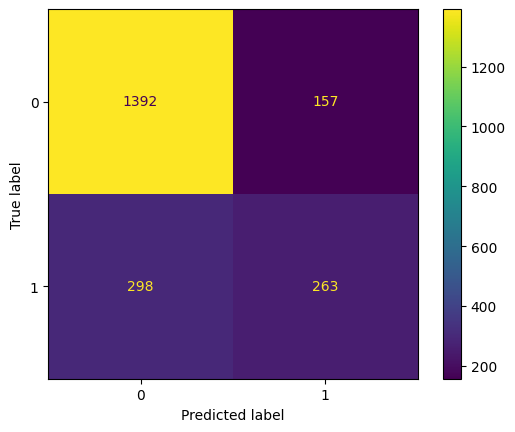

Métricas

Accuracy Train: 0.9985778138967899
Accuracy Test: 0.7843601895734598
-------------------------------------------------------------
Balanced Accuracy Train: 0.9978119832997399
Balanced Accuracy Test: 0.6837249953681808
-------------------------------------------------------------
Precision Train: 0.9984674329501916
Precision Test: 0.6261904761904762
-------------------------------------------------------------
F1 Train: 0.9973210868733257
F1 Test: 0.5361875637104995
-------------------------------------------------------------
Recall Train: 0.996177370030581
Recall Test: 0.46880570409982175
-------------------------------------------------------------
ROC AUC Train: 0.9999635083746694
ROC AUC Test: 0.8119930171728296
-------------------------------------------------------------


In [295]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_test_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)

# Matriz de confusão

print("Matriz de Confusão")
print("")
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rfc.classes_)
disp.plot()
plt.show()

# Métricas
print("Métricas")
print("")
print("Accuracy Train: {}".format(accuracy_score(y_train, y_train_pred)))
print("Accuracy Test: {}".format(accuracy_score(y_test, y_test_pred)))
print("-------------------------------------------------------------")
print("Balanced Accuracy Train: {}".format(balanced_accuracy_score(y_train, y_train_pred)))
print("Balanced Accuracy Test: {}".format(balanced_accuracy_score(y_test, y_test_pred)))
print("-------------------------------------------------------------")
print("Precision Train: {}".format(precision_score(y_train, y_train_pred)))
print("Precision Test: {}".format(precision_score(y_test, y_test_pred)))
print("-------------------------------------------------------------")
print("F1 Train: {}".format(f1_score(y_train, y_train_pred)))
print("F1 Test: {}".format(f1_score(y_test, y_test_pred)))
print("-------------------------------------------------------------")
print("Recall Train: {}".format(recall_score(y_train, y_train_pred)))
print("Recall Test: {}".format(recall_score(y_test, y_test_pred)))
print("-------------------------------------------------------------")
print("ROC AUC Train: {}".format(roc_auc_score(y_train, rfc.predict_proba(X_train)[:, 1])))
print("ROC AUC Test: {}".format(roc_auc_score(y_test, rfc.predict_proba(X_test)[:,1])))
print("-------------------------------------------------------------")

Vemos que as métricas de treinamento foram boas, mas o mesmo não se verifica nas métricas de teste, o que pressupõe a existência de overfitting. Vamos agora fazer a sintonia do modelo utilizando o GridSearch, buscando os hiperparâmetros adequados.

In [296]:
# Fazendo a sintonia (escolha dos melhores parâmetros)

parameters = {"max_depth" : [1, 2, 3, 4,5, 6,7,8,9,10],
              "n_estimators": [100,300, 500]
              }
gridsearch_rfc = GridSearchCV(rfc, parameters, scoring = "accuracy", cv = 5, n_jobs = -1)
gridsearch_rfc.fit(X_train, y_train)
gridsearch_rfc.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Encontramos os melhores hiperparâmetros e agora vamos fazer a sintonia com eles.

In [297]:
rfc_tunned = RandomForestClassifier(bootstrap= True,
 ccp_alpha= 0.0,
 class_weight= None,
 criterion= 'gini',
 max_depth= 9,
 max_features= 'sqrt',
 max_leaf_nodes= None,
 max_samples= None,
 min_impurity_decrease= 0.0,
 min_samples_leaf= 1,
 min_samples_split= 2,
 min_weight_fraction_leaf= 0.0,
 n_estimators= 100,
 n_jobs= None,
 oob_score= False,
 random_state= None,
 verbose= 0,
 warm_start= False)

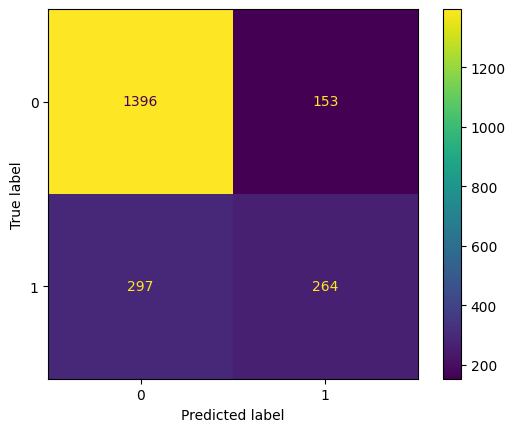

Métricas

Accuracy Train: 0.8673303535148313
Accuracy Test: 0.7867298578199052
-------------------------------------------------------------
Balanced Accuracy Train: 0.9978119832997399
Balanced Accuracy Test: 0.6859074165495767
-------------------------------------------------------------
Precision Train: 0.8127984718242598
Precision Test: 0.6330935251798561
-------------------------------------------------------------
F1 Train: 0.7227176220806794
F1 Test: 0.5398773006134969
-------------------------------------------------------------
Recall Train: 0.650611620795107
Recall Test: 0.47058823529411764
-------------------------------------------------------------
ROC AUC Train: 0.9464906902988549
ROC AUC Test: 0.829987491211051


In [298]:
rfc_tunned.fit(X_train, y_train)
y_test_tunned_pred = rfc_tunned.predict(X_test)
y_train_tunned_pred = rfc_tunned.predict(X_train)

cm = confusion_matrix(y_test, y_test_tunned_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rfc.classes_)
disp.plot()
plt.show()

# Métricas
print("Métricas")
print("")
print("Accuracy Train: {}".format(accuracy_score(y_train, y_train_tunned_pred)))
print("Accuracy Test: {}".format(accuracy_score(y_test, y_test_tunned_pred)))
print("-------------------------------------------------------------")
print("Balanced Accuracy Train: {}".format(balanced_accuracy_score(y_train, y_train_pred)))
print("Balanced Accuracy Test: {}".format(balanced_accuracy_score(y_test, y_test_tunned_pred)))
print("-------------------------------------------------------------")
print("Precision Train: {}".format(precision_score(y_train, y_train_tunned_pred)))
print("Precision Test: {}".format(precision_score(y_test, y_test_tunned_pred)))
print("-------------------------------------------------------------")
print("F1 Train: {}".format(f1_score(y_train, y_train_tunned_pred)))
print("F1 Test: {}".format(f1_score(y_test, y_test_tunned_pred)))
print("-------------------------------------------------------------")
print("Recall Train: {}".format(recall_score(y_train, y_train_tunned_pred)))
print("Recall Test: {}".format(recall_score(y_test, y_test_tunned_pred)))
print("-------------------------------------------------------------")
print("ROC AUC Train: {}".format(roc_auc_score(y_train, rfc_tunned.predict_proba(X_train)[:, 1])))
print("ROC AUC Test: {}".format(roc_auc_score(y_test, rfc_tunned.predict_proba(X_test)[:,1])))

Com os parâmetros ajustados, vimos que não tivemos uma grande melhora das métricas.

**LOGISTIC REGRESSION**

Matriz de Confusão



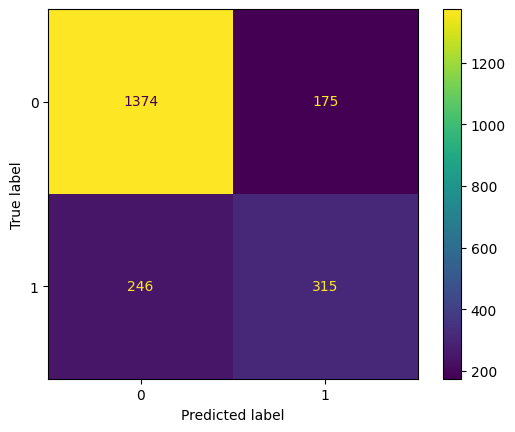

Métricas

Accuracy Train: 0.8031288094270622
Accuracy Test: 0.8004739336492891
-------------------------------------------------------------
Balanced Accuracy Train: 0.7232494174032686
Balanced Accuracy Test: 0.7242606062907586
-------------------------------------------------------------
Precision Train: 0.6531165311653117
Precision Test: 0.6428571428571429
-------------------------------------------------------------
F1 Train: 0.5987577639751551
F1 Test: 0.5994291151284492
-------------------------------------------------------------
Recall Train: 0.5527522935779816
Recall Test: 0.5614973262032086
-------------------------------------------------------------
ROC AUC Train: 0.8507159339571391
ROC AUC Test: 0.8354622440560237
-------------------------------------------------------------


In [299]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

print("Matriz de Confusão")
print("")
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = lr.classes_)
disp.plot()
plt.show()

# Métricas
print("Métricas")
print("")
print("Accuracy Train: {}".format(accuracy_score(y_train, y_train_pred)))
print("Accuracy Test: {}".format(accuracy_score(y_test, y_test_pred)))
print("-------------------------------------------------------------")
print("Balanced Accuracy Train: {}".format(balanced_accuracy_score(y_train, y_train_pred)))
print("Balanced Accuracy Test: {}".format(balanced_accuracy_score(y_test, y_test_pred)))
print("-------------------------------------------------------------")
print("Precision Train: {}".format(precision_score(y_train, y_train_pred)))
print("Precision Test: {}".format(precision_score(y_test, y_test_pred)))
print("-------------------------------------------------------------")
print("F1 Train: {}".format(f1_score(y_train, y_train_pred)))
print("F1 Test: {}".format(f1_score(y_test, y_test_pred)))
print("-------------------------------------------------------------")
print("Recall Train: {}".format(recall_score(y_train, y_train_pred)))
print("Recall Test: {}".format(recall_score(y_test, y_test_pred)))
print("-------------------------------------------------------------")
print("ROC AUC Train: {}".format(roc_auc_score(y_train, lr.predict_proba(X_train)[:, 1])))
print("ROC AUC Test: {}".format(roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])))
print("-------------------------------------------------------------")

Com o Logistic Regression, verifica-se que algumas métricas estão até melhores e que não há overfitting. Vamos buscar os melhores hiperparâmetros através do GridSearch

In [300]:
parameters = {
    'penalty': ['l1','l2'],
    'C': [0.001,0.01,0.1,1,10,100,1000]
    }

gridsearch_lr = GridSearchCV(lr, parameters, scoring = "accuracy", cv = 5, n_jobs = -1)
gridsearch_lr.fit(X_train, y_train)
gridsearch_lr.best_estimator_.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Agora vamos retreinar o modelo com os melhores hiperparâmetros

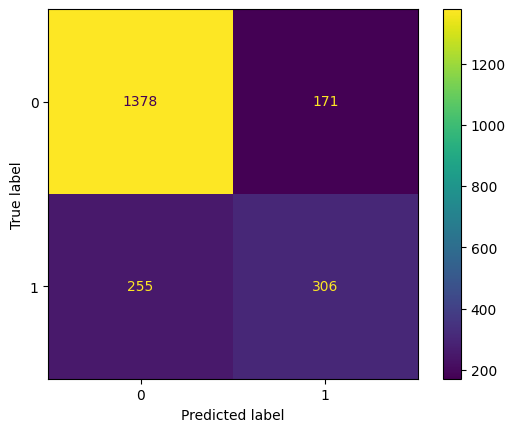

Métricas

Accuracy Train: 0.8027224705404307
Accuracy Test: 0.7981042654028436
-------------------------------------------------------------
Balanced Accuracy Train: 0.7198018578785526
Balanced Accuracy Test: 0.7175303715006749
-------------------------------------------------------------
Precision Train: 0.6555863342566943
Precision Test: 0.6415094339622641
-------------------------------------------------------------
F1 Train: 0.5938937682977834
F1 Test: 0.5895953757225434
-------------------------------------------------------------
Recall Train: 0.5428134556574924
Recall Test: 0.5454545454545454
-------------------------------------------------------------
ROC AUC Train: 0.8496943799935353
ROC AUC Test: 0.8348580937158009
-------------------------------------------------------------


In [301]:
lr_tunned = LogisticRegression(
 C= 0.1,
 class_weight= None,
 dual= False,
 fit_intercept= True,
 intercept_scaling= 1,
 l1_ratio= None,
 max_iter= 100,
 multi_class= 'auto',
 n_jobs= None,
 penalty= 'l2',
 random_state= None,
 solver= 'lbfgs',
 tol= 0.0001,
 verbose= 0,
 warm_start= False)

lr_tunned.fit(X_train, y_train)
y_test_tunned_pred = lr_tunned.predict(X_test)
y_train_tunned_pred = lr_tunned.predict(X_train)

#Plota Matriz de Confusão
cm = confusion_matrix(y_test, y_test_tunned_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = lr_tunned.classes_)
disp.plot()
plt.show()

#Métricas

print("Métricas")
print("")
print("Accuracy Train: {}".format(accuracy_score(y_train, y_train_tunned_pred)))
print("Accuracy Test: {}".format(accuracy_score(y_test, y_test_tunned_pred)))
print("-------------------------------------------------------------")
print("Balanced Accuracy Train: {}".format(balanced_accuracy_score(y_train, y_train_tunned_pred)))
print("Balanced Accuracy Test: {}".format(balanced_accuracy_score(y_test, y_test_tunned_pred)))
print("-------------------------------------------------------------")
print("Precision Train: {}".format(precision_score(y_train, y_train_tunned_pred)))
print("Precision Test: {}".format(precision_score(y_test, y_test_tunned_pred)))
print("-------------------------------------------------------------")
print("F1 Train: {}".format(f1_score(y_train, y_train_tunned_pred)))
print("F1 Test: {}".format(f1_score(y_test, y_test_tunned_pred)))
print("-------------------------------------------------------------")
print("Recall Train: {}".format(recall_score(y_train, y_train_tunned_pred)))
print("Recall Test: {}".format(recall_score(y_test, y_test_tunned_pred)))
print("-------------------------------------------------------------")
print("ROC AUC Train: {}".format(roc_auc_score(y_train, lr_tunned.predict_proba(X_train)[:, 1])))
print("ROC AUC Test: {}".format(roc_auc_score(y_test, lr_tunned.predict_proba(X_test)[:,1])))
print("-------------------------------------------------------------")



Com a otimização dos parâmetros, não se verificou melhoria nas métricas. Na verdade, até pioraram um pouco, no geral. Todavia, as métricas de teste ficaram muito mais próximas das de treinamento.